# MLP Pour detection de cancer du sein 

**Ce Projet est une implementation from scratch d'une méthode de deep learning: MLP**

Pour la réalisation du projet on se basera sur les données du cancer du sein ainsi que sur le notebook Kaggle: 
https://www.kaggle.com/code/vitorgamalemos/multilayer-perceptron-from-scratch  

qui traite pas à pas de l'implémentation de méthode MLP d&éjà vu en cours avec Pr.Kaddami Saousane.


**Consignes**

1- Reproduire les classes créés et résoudre les éventuels bugs

2- Tester sur le dataset Iris comme indiqué

3- Réitérer l'entraînement et le test sur le load_breast_cancer() de sklearn. Utiliser l'import:


from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

## Import des bibliothèques

In [1]:
# Bibliothèques de traitement des données et statistiques descriptives 
import random
import numpy as np 
import pandas as pd

# Bibliothèques des graphes et figures
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt 

# Bases de données et méthodes de deep learning
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()


**Parametrer les styles de seaborn**

In [2]:
sns.set(style='whitegrid'); sns.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import des données en CSV

In [3]:
df = pd.read_csv("Data/cancerData.csv")
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Description des données**

In [4]:
df.describe()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Description de la base uploadée avec sklearn methode**

In [5]:
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Heatmap**

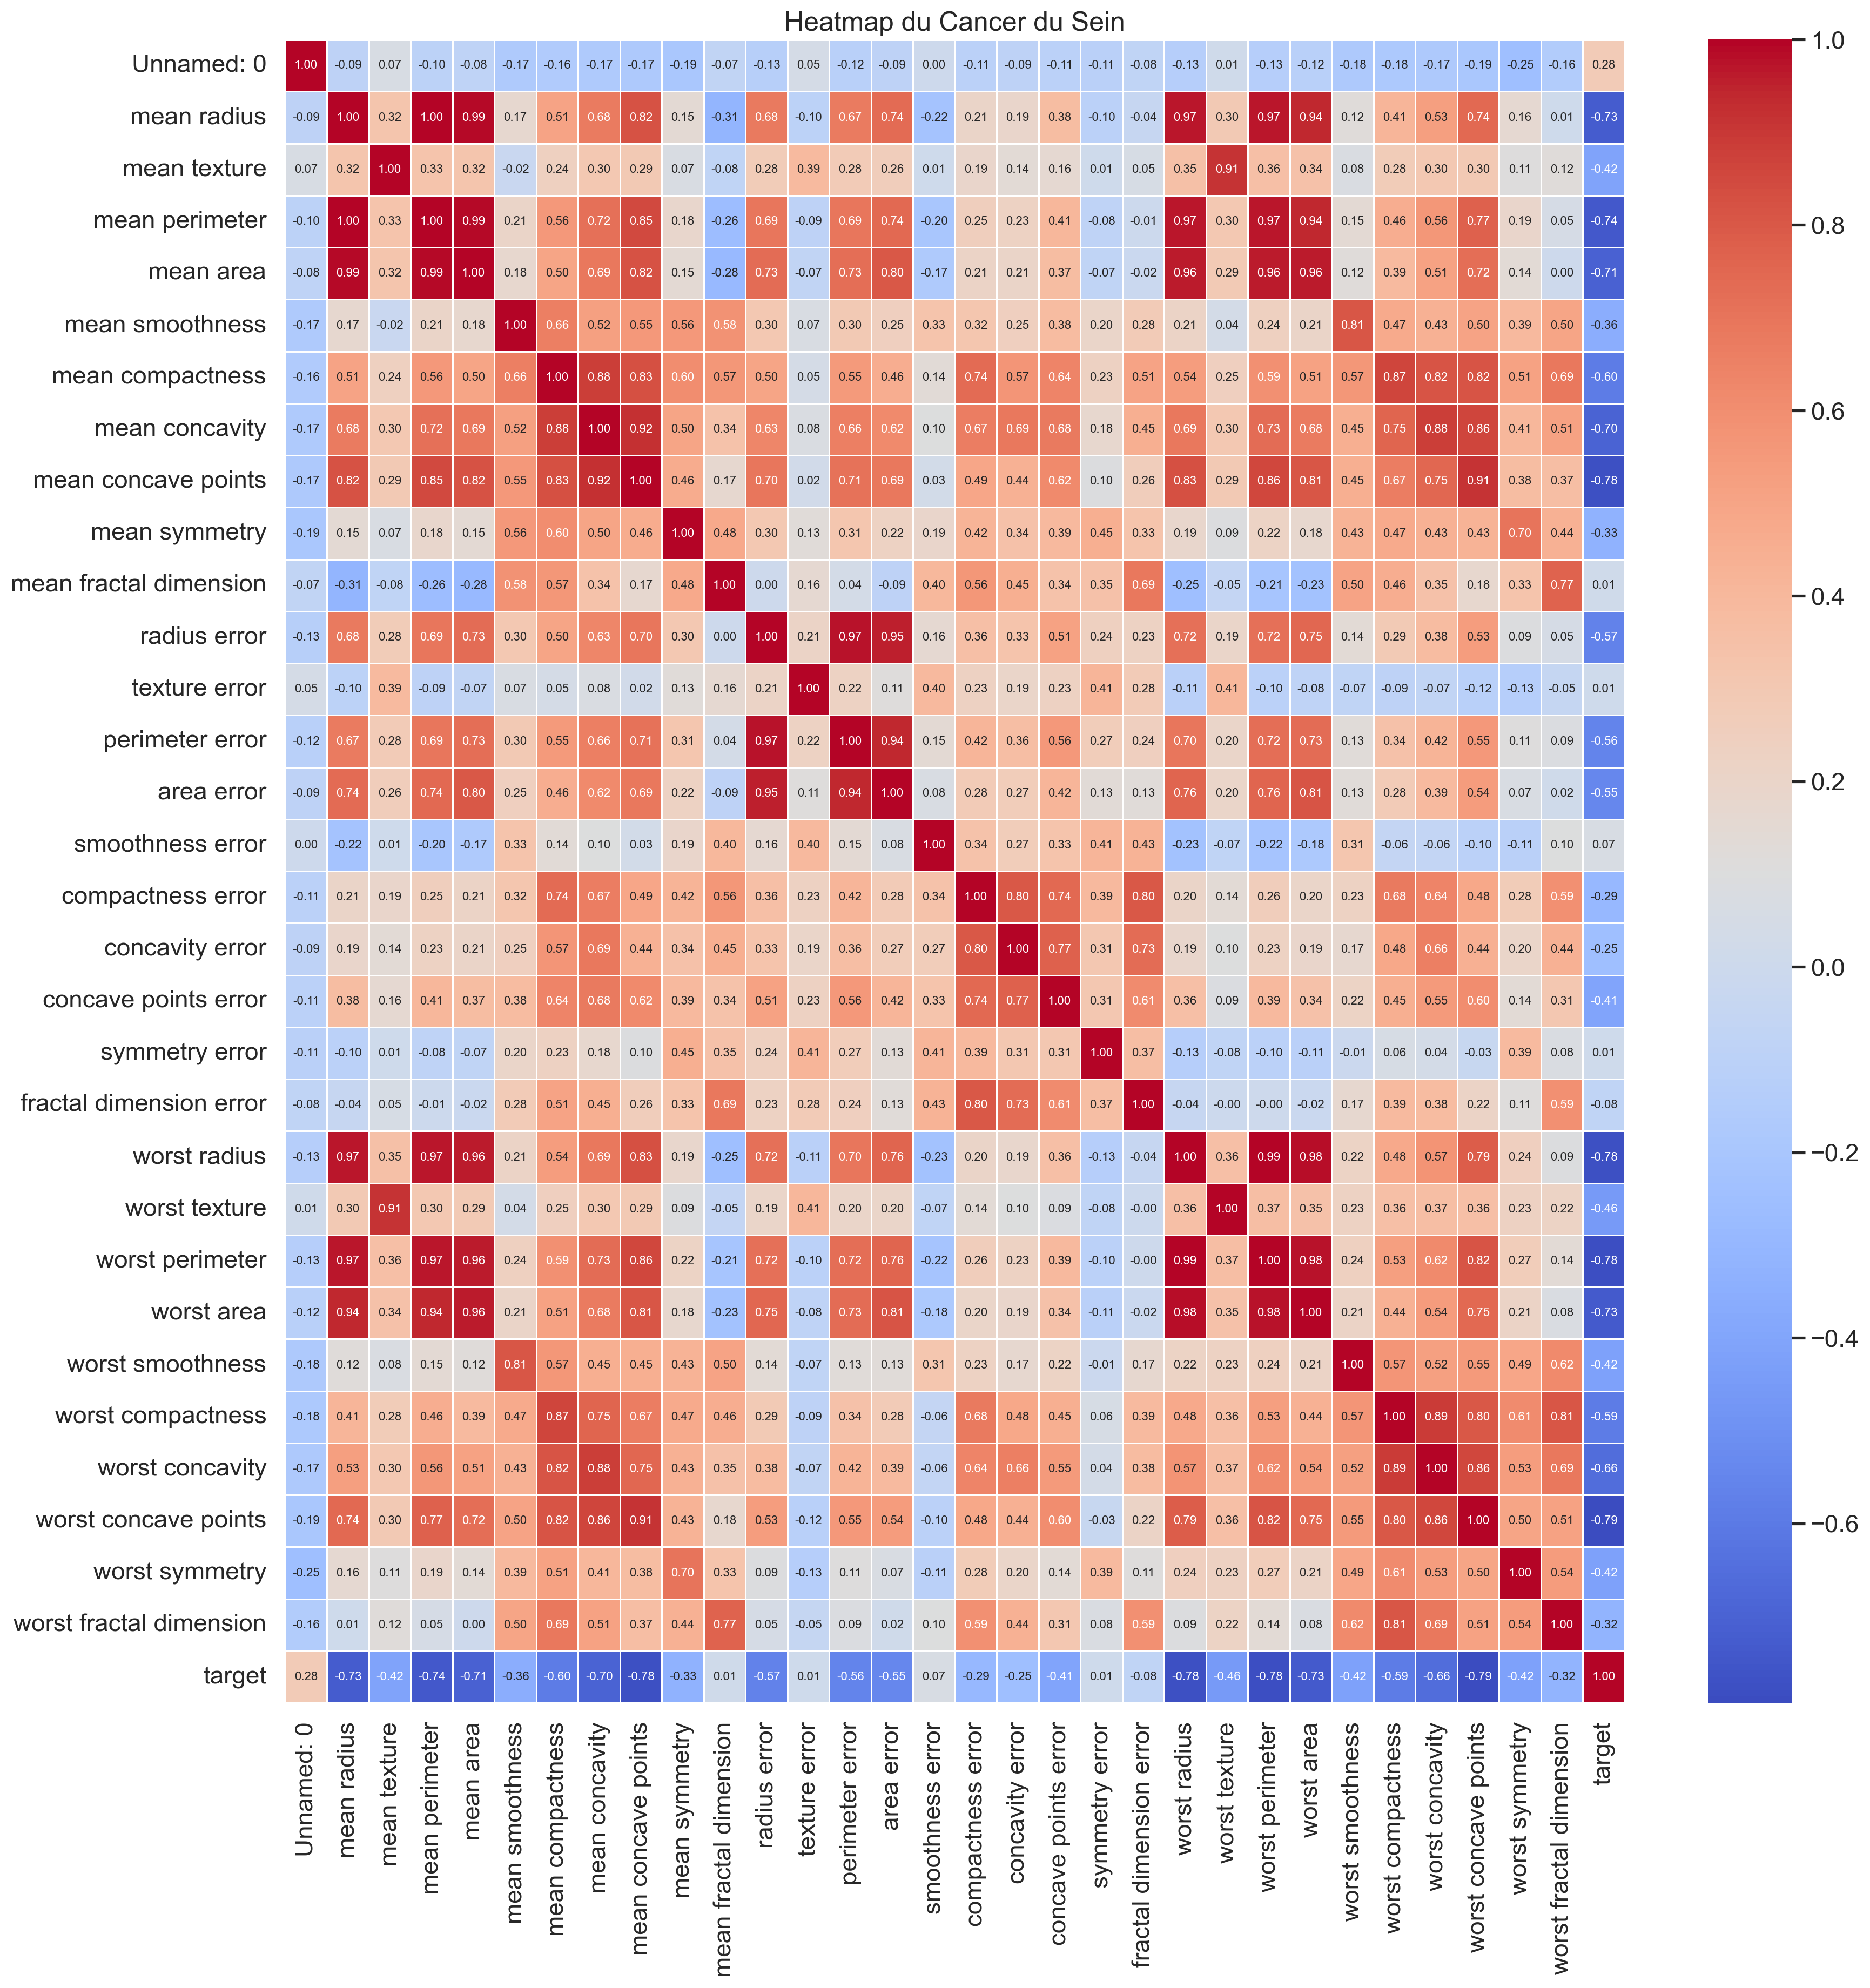

In [6]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer la heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Heatmap du Cancer du Sein')
plt.show()


Celon la correlation on ne garde que les 

**Selection des features interessants**


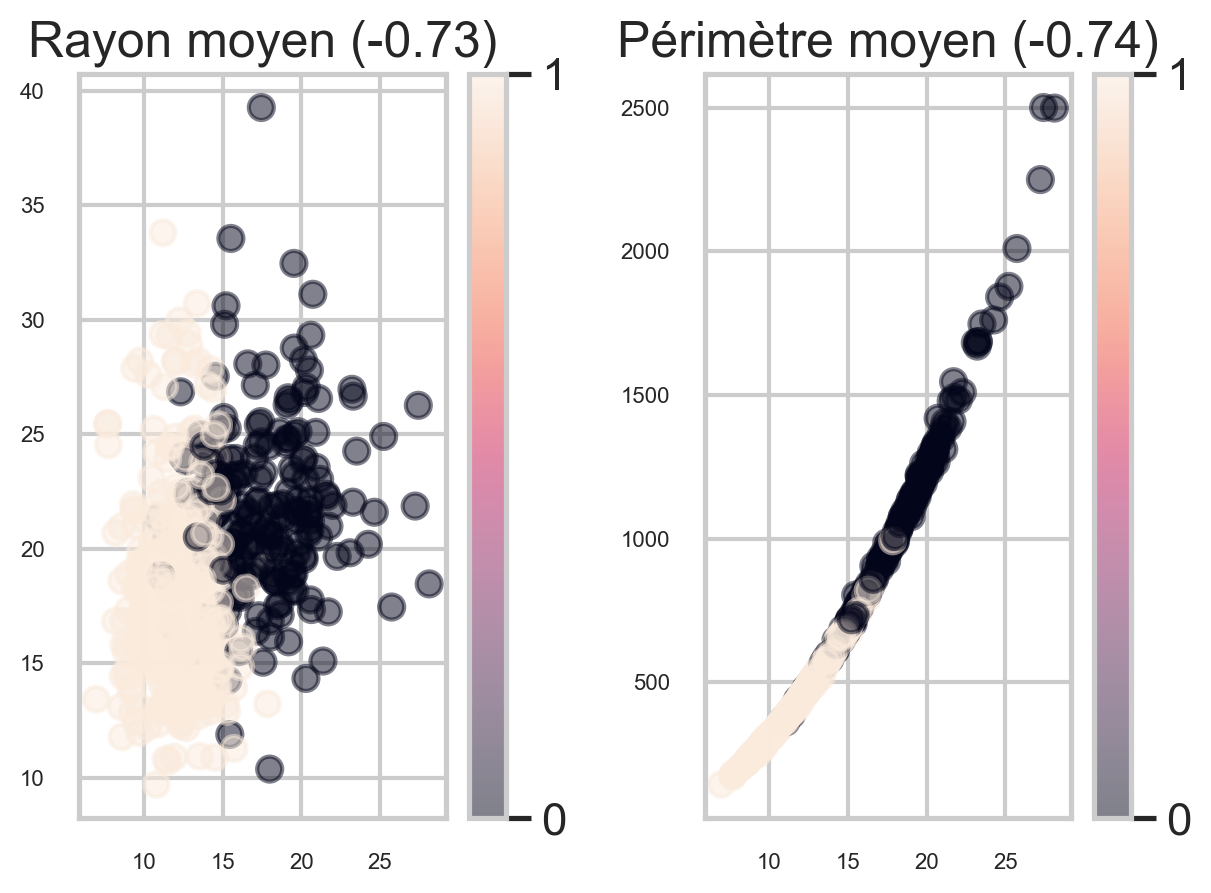

In [7]:
n_samples, n_features = cancer_data.data.shape


plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(cancer_data.data[:, 0], cancer_data.data[:, 1], alpha=0.5, 
                           c=cancer_data.target) 
plt.colorbar(ticks=([0, 1]))
plt.title('Rayon moyen (-0.73)')
plt.tick_params(axis='both', labelsize=8)



plt.subplot(1, 2, 2)
scatter_plot = plt.scatter(cancer_data.data[:, 0], cancer_data.data[:, 3], alpha=0.5, 
                           c=cancer_data.target) 
plt.colorbar(ticks=([0, 1]))
plt.title('Périmètre moyen (-0.74)')
plt.tick_params(axis='both', labelsize=8)




#Ajustements et affichage des figures
plt.tight_layout()
plt.show()

In [17]:
plt.subplot(1, 2, 3)
scatter_plot = plt.scatter(cancer_data.data[:, 0], cancer_data.data[:, 4], alpha=0.5, 
                           c=cancer_data.target) 
plt.colorbar(ticks=([0, 1]))
plt.title('PSurface moyenne (-0.74)')
plt.tick_params(axis='both', labelsize=8)



#Ajustements et affichage des figures
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 2, not 3

<Figure size 640x480 with 0 Axes>